In [ ]:
#Loading Necessary Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,3,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,4,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,5107,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5108,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5109,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# #Handling Missing Value

In [ ]:
missing_value = ["N/A" , "na", np.nan]
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv' , na_values=missing_value)

In [ ]:
stroke_data['bmi'] = stroke_data['bmi'].replace(np.nan, 0)

In [ ]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
stroke_data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

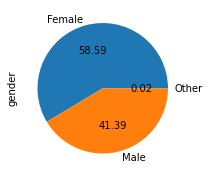

In [ ]:
stroke_data['gender'].value_counts().plot.pie(figsize =(3,3), autopct="%0.2f")

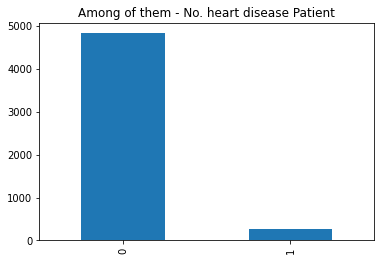

In [ ]:
stroke_data['heart_disease'].value_counts().plot.bar(title="Among of them - No. heart disease Patient")

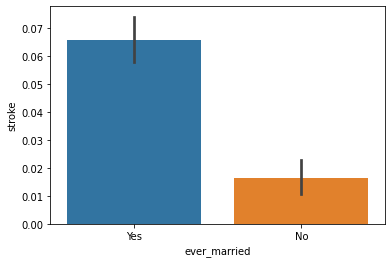

In [ ]:
sns.barplot(x = 'ever_married',y = 'stroke',data = stroke_data)
plt.show()

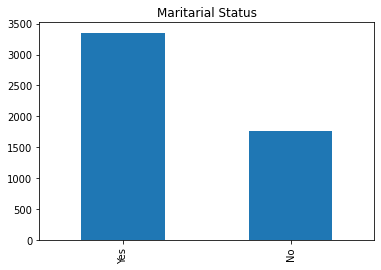

In [ ]:
stroke_data['ever_married'].value_counts().plot.bar(title="Maritarial Status")

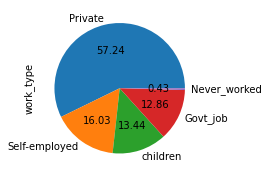

In [ ]:
stroke_data['work_type'].value_counts().plot.pie(figsize =(3,3), autopct="%0.2f")

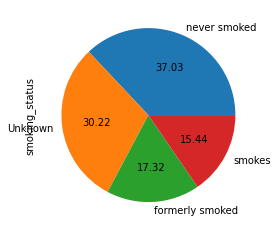

In [ ]:
stroke_data['smoking_status'].value_counts().plot.pie(figsize =(4,4), autopct="%0.2f")

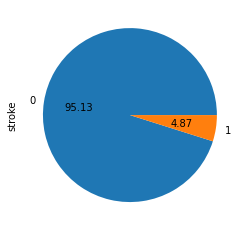

In [ ]:
stroke_data['stroke'].value_counts().plot.pie(figsize =(4,4), autopct="%0.2f")

In [ ]:
stroke_data = stroke_data.dropna()

# Data Modification

In [ ]:
def tran_gender(x):
    if x== 'Male':
        return 1
    if x== 'Female':
        return 0

In [ ]:
stroke_data['Trans_gender']=stroke_data['gender'].apply(tran_gender)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Trans_gender
0,1,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0.0
2,3,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,4,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.0
4,5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0.0
5106,5107,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0.0
5107,5108,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0.0
5108,5109,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1.0


In [ ]:
def tran_evermarried(x):
    if x== 'Yes':
        return 1
    if x== 'No':
        return 0

In [ ]:
stroke_data['Trans_evermarried']=stroke_data['ever_married'].apply(tran_evermarried)

In [ ]:
def tran_smoking_status(x):
    if x== 'formerly smoked':
        return 1
    if x== 'smokes' :
        return 1
    if x== 'never smoked':
        return 0
    if x== 'Unknown':
        return 0


In [ ]:
stroke_data['Trans_smoking_status']=stroke_data['smoking_status'].apply(tran_smoking_status)

In [ ]:
def tran_Residence_type(x):
    if x== 'Urban':
        return 1
    if x== 'Rural':
        return 0

In [ ]:
stroke_data['Trans_Residence_type']=stroke_data['Residence_type'].apply(tran_Residence_type)

In [ ]:
def tran_work_type(x):
    if x== 'Private':
        return 1
    if x== 'Self-employed':
        return 1
    if x== 'Govt_job':
        return 1
    if x== 'children':
        return 0

In [ ]:
stroke_data['Trans_work_type']=stroke_data['work_type'].apply(tran_work_type)

In [ ]:
#get more info about data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5110 non-null   int64  
 1   gender                5110 non-null   object 
 2   age                   5110 non-null   float64
 3   hypertension          5110 non-null   int64  
 4   heart_disease         5110 non-null   int64  
 5   ever_married          5110 non-null   object 
 6   work_type             5110 non-null   object 
 7   Residence_type        5110 non-null   object 
 8   avg_glucose_level     5110 non-null   float64
 9   bmi                   4909 non-null   float64
 10  smoking_status        5110 non-null   object 
 11  stroke                5110 non-null   int64  
 12  Trans_gender          5109 non-null   float64
 13  Trans_evermarried     5110 non-null   int64  
 14  Trans_smoking_status  5110 non-null   int64  
 15  Trans_Residence_type 

In [ ]:
#Statistical data
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Trans_gender,Trans_evermarried,Trans_smoking_status,Trans_Residence_type,Trans_work_type
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5109.000000,5110.000000,5110.000000,5110.000000,5088.000000
mean,2555.500000,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413975,0.656164,0.327593,0.508023,0.864976
std,1475.274268,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,0.492592,0.475034,0.469381,0.499985,0.341782
min,1.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1278.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2555.500000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,3832.750000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5110.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking how many data are having stroke patient
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_data.drop(
labels= ["gender","ever_married", "work_type", "Residence_type", "smoking_status"], axis=1,
    inplace= False
)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Trans_gender,Trans_evermarried,Trans_smoking_status,Trans_Residence_type,Trans_work_type
0,1,67.0,0,1,228.69,36.6,1,1.0,1,1,1,1.0
1,2,61.0,0,0,202.21,NaN,1,0.0,1,0,0,1.0
2,3,80.0,0,1,105.92,32.5,1,1.0,1,0,0,1.0
3,4,49.0,0,0,171.23,34.4,1,0.0,1,1,1,1.0
4,5,79.0,1,0,174.12,24.0,1,0.0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,80.0,1,0,83.75,NaN,0,0.0,1,0,1,1.0
5106,5107,81.0,0,0,125.20,40.0,0,0.0,1,0,1,1.0
5107,5108,35.0,0,0,82.99,30.6,0,0.0,1,0,0,1.0
5108,5109,51.0,0,0,166.29,25.6,0,1.0,1,1,0,1.0


# Data Visualization

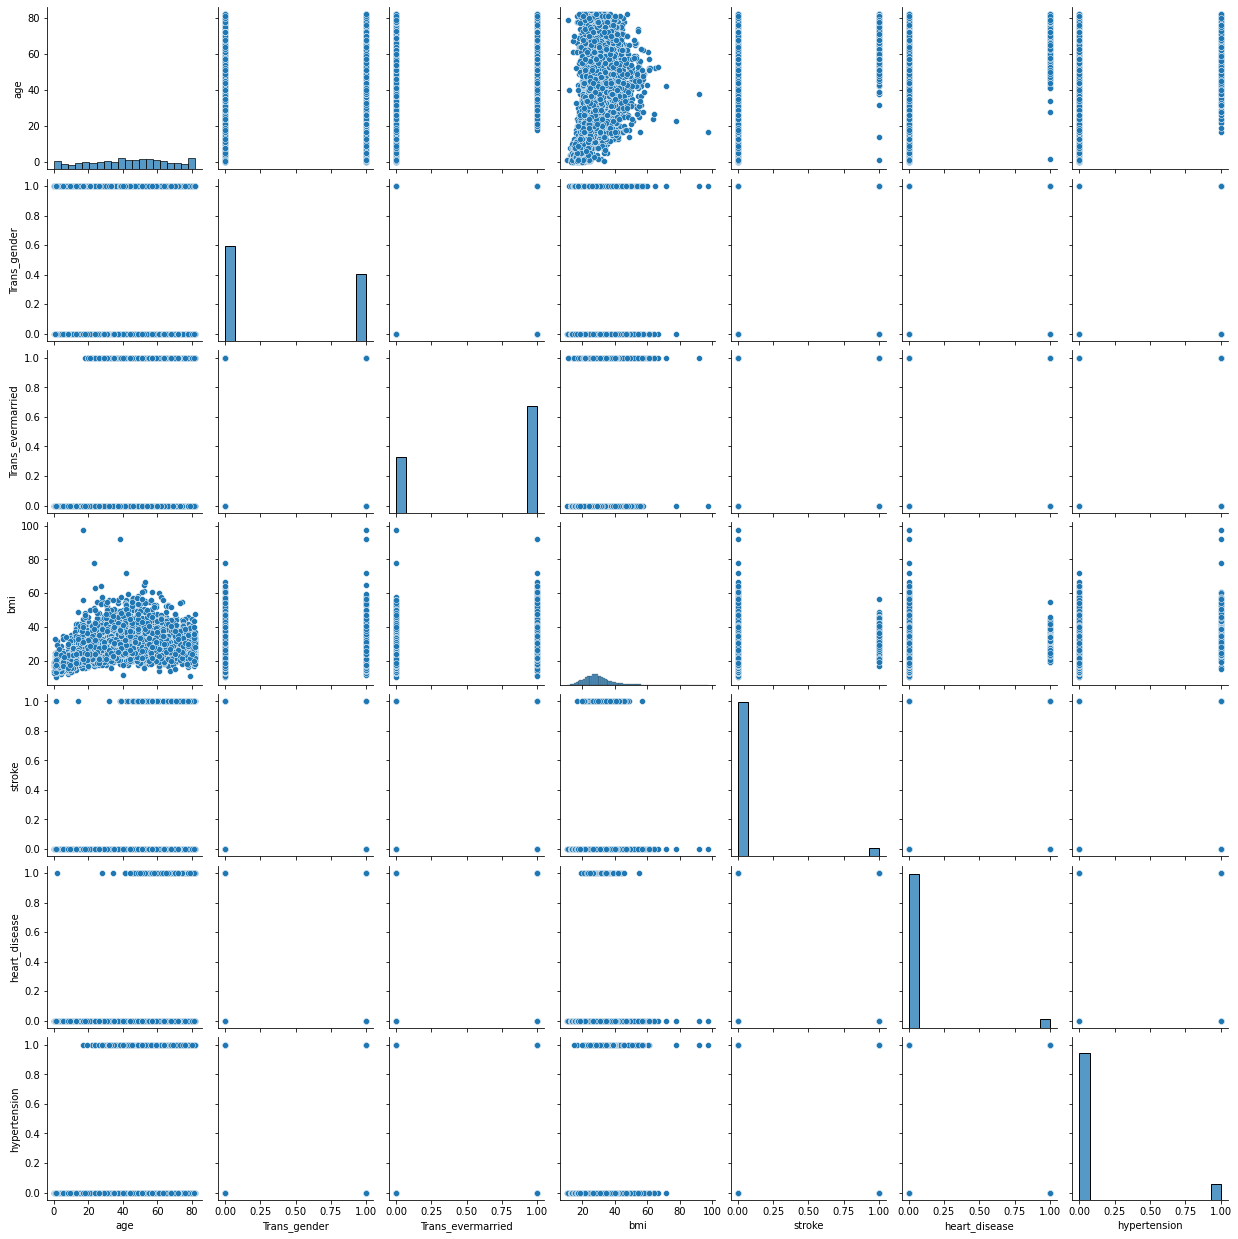

In [ ]:
sns.pairplot(stroke_data[['age' , 'Trans_gender' , 'Trans_evermarried' , 'bmi' , 'stroke', 'heart_disease' ,'hypertension']] )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

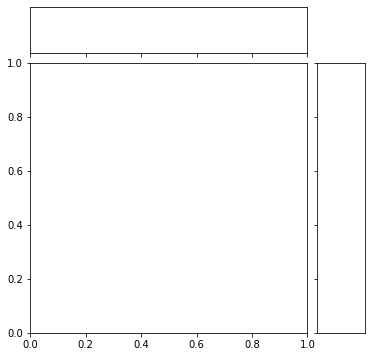

In [ ]:
sns.jointplot(stroke_data[['age' , 'Trans_gender' , 'Trans_evermarried' , 'bmi' , 'stroke' , 'heart_disease' ,'hypertension' ]] )

C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

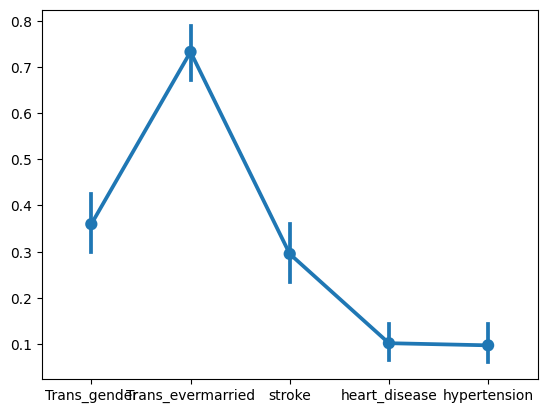

In [ ]:
sns.pointplot(stroke_data[['Trans_gender' , 'Trans_evermarried' , 'stroke' ,'heart_disease' ,'hypertension' ]] )

In [ ]:
stroke_data=stroke_data.dropna()

In [ ]:
Train_stroke_data = stroke_data [['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi','Trans_gender', 'Trans_evermarried',
       'Trans_smoking_status', 'Trans_Residence_type', 'Trans_work_type', 'stroke']]

In [ ]:
#Spliting the features and target
x = Train_stroke_data.drop(columns = 'stroke', axis = 1)
y = Train_stroke_data['stroke']

In [ ]:
print(x)

       age  hypertension  heart_disease  avg_glucose_level   bmi  \
0     67.0             0              1             228.69  36.6   
2     80.0             0              1             105.92  32.5   
3     49.0             0              0             171.23  34.4   
4     79.0             1              0             174.12  24.0   
5     81.0             0              0             186.21  29.0   
...    ...           ...            ...                ...   ...   
5104  13.0             0              0             103.08  18.6   
5106  81.0             0              0             125.20  40.0   
5107  35.0             0              0              82.99  30.6   
5108  51.0             0              0             166.29  25.6   
5109  44.0             0              0              85.28  26.2   

      Trans_gender  Trans_evermarried  Trans_smoking_status  \
0              1.0                  1                     1   
2              1.0                  1                    

# Spliting data into trainnig and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y ,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(4886, 10) (3908, 10) (978, 10)


# Using Algorithm

1. LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

In [ ]:
# Trainning Logistic Regression Model
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Train_stroke_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,Trans_gender,Trans_evermarried,Trans_smoking_status,Trans_Residence_type,Trans_work_type,stroke
0,67.0,0,1,228.69,36.6,1.0,1,1,1,1.0,1
2,80.0,0,1,105.92,32.5,1.0,1,0,0,1.0,1
3,49.0,0,0,171.23,34.4,0.0,1,1,1,1.0,1
4,79.0,1,0,174.12,24.0,0.0,1,0,0,1.0,1
5,81.0,0,0,186.21,29.0,1.0,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0.0,0,0,0,0.0,0
5106,81.0,0,0,125.20,40.0,0.0,1,0,1,1.0,0
5107,35.0,0,0,82.99,30.6,0.0,1,0,0,1.0,0
5108,51.0,0,0,166.29,25.6,1.0,1,1,0,1.0,0


In [ ]:
# Accuracy trainning
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ' , training_data_accuracy )

Accuracy on Training data :  0.9575230296827022


In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ' , test_data_accuracy)

Accuracy on Test data :  0.9570552147239264


In [ ]:
input_data =(21,0,1,228.69,36.6,1,1,1,1,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 2.KNeighbours Classifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
# Trainning Logistic Regression Model
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy trainning by KNN
x_train_prediction = KNN.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data :  ' ,  training_data_accuracy)

Accuracy on Training data :   0.9567553735926305


In [ ]:
x_test_prediction = KNN.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9539877300613497


In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = KNN.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 3. Naive Byes Algorithm

In [ ]:
NB = GaussianNB()

In [ ]:
NB.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Accuracy trainning by KNN
x_train_prediction = NB.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data :  ' ,  training_data_accuracy)

Accuracy on Training data :   0.8515864892528148


In [ ]:
NB.score(x_train, y_train)

0.8515864892528148

In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = NB.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


4. Random Forest

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Accuracy trainning by KNN
x_train_prediction = RFR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

ValueError: ignored

In [ ]:
print('Accuracy on Training data :  ' ,  training_data_accuracy)

In [ ]:
RFR.score(x_train,y_train)

0.8583054670130468

In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = RFR.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0.]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# 5. Suppport Vector Machine

In [ ]:
SVM = SVC()

In [ ]:
SVM.fit(x_train, y_train)

SVC()

In [ ]:
SVM_test = SVM.score(x_test,y_test)

In [ ]:
SVM_train = SVM.score(x_train,y_train)

In [ ]:
input_data =(28335,21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = SVM.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
